## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---
#### Shareability potential

In [1]:
import os
import pandas as pd
%load_ext autoreload
%autoreload 2
cwd = os.getcwd()

In [2]:
os.chdir(os.path.join(cwd,'../..'))
import ExMAS.main
import ExMAS.utils

In [3]:
from ExMAS.utils import inData as inData

### prepare

1. __make the config__ (see more details in `ExMAS/notebooks/01 configuration.ipynb`)

In [4]:
params = ExMAS.utils.get_config('ExMAS/data/configs/default.json') # load the default 

In [5]:
params.gammdist.shape = 2
params.gammdist.scale = 500
params.gamma_imp.shape = 1.15
params.gamma_imp.scale = 3200
params.nP = 200
params.nCenters = 3
params.city = 'Amsterdam, Netherlands'
params.t0 = '17:00'
params = ExMAS.utils.make_paths(params)
ExMAS.utils.save_config(params, path = 'ExMAS/data/configs/potential.json')

In [6]:
params.t0 = pd.to_datetime(params.t0)

2. __load the network__ (see more details in `ExMAS/notebooks/02 NetworkGraphs.ipynb`)

In [7]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

3. __generate trip requests__ (see more details in `ExMAS/notebooks/03 Demand Generation.ipynb`)

In [8]:
inData = ExMAS.utils.synthetic_demand_poly_II(inData, params)

4. __save requests__ 

In [9]:
inData.requests.to_csv('ExMAS/spinoffs/poly_demand.csv')

5. __load requests__ 

In [10]:
inData.requests = pd.read_csv('ExMAS/spinoffs/poly_demand.csv', index_col = 0)
inData.requests.treq = pd.to_datetime(inData.requests.treq)
inData.requests['pax_id'] = inData.requests.index.copy()
inData.requests.tarr = pd.to_datetime(inData.requests.tarr)
inData.requests.ttrav = pd.to_timedelta(inData.requests.ttrav)

5. __visualize demand__ 

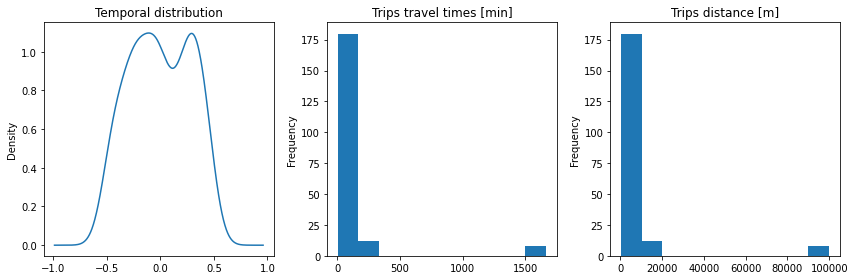

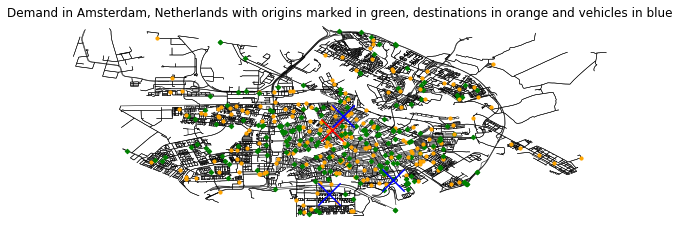

In [11]:
ExMAS.utils.plot_demand_poly(inData, params)

### run

21-09-20 11:57:39-INFO-Initializing pairwise trip shareability between 200 and 200 trips.
21-09-20 11:57:39-INFO-creating combinations
21-09-20 11:57:39-INFO-39800	 nR*(nR-1)
21-09-20 11:57:39-INFO-16947	departure compatibility
21-09-20 11:57:40-INFO-7512	origins shareability
21-09-20 11:57:40-INFO-1482	utility for i
21-09-20 11:57:40-INFO-282	utility for j
21-09-20 11:57:41-INFO-364	LIFO pairs
21-09-20 11:57:41-INFO-Reduction of feasible pairs by 99.09%


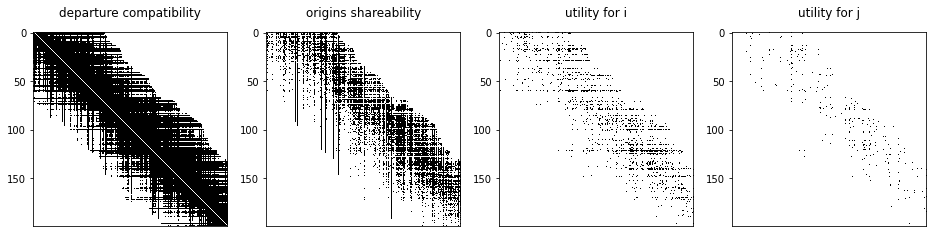

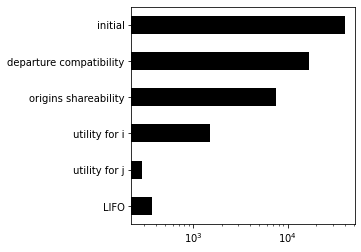

21-09-20 11:57:42-INFO-Degree 2 	Completed
21-09-20 11:57:42-INFO-trips to extend at degree 2 : 646
21-09-20 11:57:42-INFO-At degree 2 feasible extensions found out of 168 searched
21-09-20 11:57:42-INFO-Degree 3 	Completed
21-09-20 11:57:42-INFO-trips to extend at degree 3 : 168
21-09-20 11:57:42-INFO-At degree 3 feasible extensions found out of 7 searched
21-09-20 11:57:42-INFO-Degree 4 	Completed
21-09-20 11:57:42-INFO-trips to extend at degree 4 : 7
21-09-20 11:57:42-INFO-At degree 4 feasible extensions found out of 0 searched
21-09-20 11:57:42-INFO-Degree 5 	Completed
21-09-20 11:57:42-INFO-No more trips to exted at degree 5
21-09-20 11:57:43-INFO-Matching 200 trips to 1021 rides in order to minimize u_veh


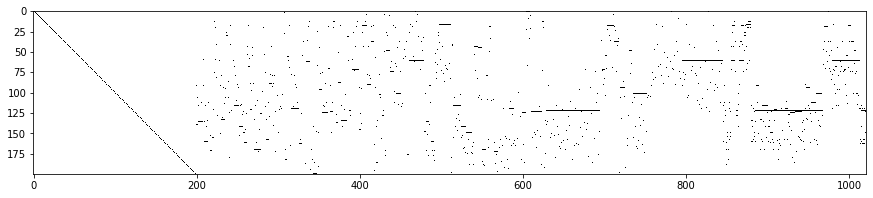

21-09-20 11:57:43-INFO-Problem solution: Optimal. 
Total costs for single trips:        218,491 
reduced by matching to:              153,281
21-09-20 11:57:43-INFO-Calculations  completed
21-09-20 11:57:44-INFO-DotMap(VehHourTrav=152651, VehHourTrav_ns=218491, PassHourTrav=233725, PassHourTrav_ns=218491, PassUtility=3112.866525, PassUtility_ns=3387.617, mean_lambda=0.3963218223146021, revenue_s=229415.55, revenue_ns=327736.5, Fare_Discount=-0.30000000000000004, nR=200, SINGLE=100, PAIRS=42, TRIPLES=4, QUADRIPLES=1, QUINTETS=0, PLUS5=0, shared_ratio=0.5, fleet_size_nonshared=47.0, fleet_size_shared=38.0, lambda_shared=0.3963218223146021)


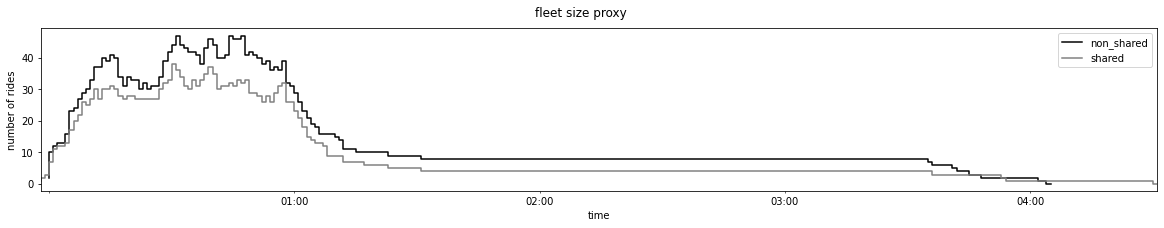

In [12]:
inData = ExMAS.main(inData, params, plot = True)

### results:
> illustrative example of 100 rides

KPIs

In [13]:
KPIs = inData.sblts.res.to_frame()
KPIs['description']  = ExMAS.utils.KPIs_descriptions
KPIs.columns = ['KPI', 'description']
KPIs

,KPI,description
VehHourTrav,152651,total travel time of vehicles (with travellers...
VehHourTrav_ns,218491,as above yet in non-shared scenarion
PassHourTrav,233725,total travel time of passengers
PassHourTrav_ns,218491,as above yet in non-shared scenarion
PassUtility,3112.87,total (dis)utility of passengers
PassUtility_ns,3387.62,as above yet in non-shared scenarion
mean_lambda,0.396322,mean vehicle cost reduction (lambda) over shar...
revenue_s,229416,total fares paid by travellers sharing
revenue_ns,327736,as above yet in non-shared scenarion
Fare_Discount,-0.3,relative revenue reduction


In [14]:
inData.sblts.requests.sample(10)

,index,origin,destination,treq,tdep,ttrav,tarr,tdrop,dist,pax_id,VoT,delta,u,u_PT,ride_id,ttrav_sh,u_sh,kind,position
114,53,46381175,3214960374,1915,NaN,512,2020-09-21 18:11:34,NaN,4098,53,0.0035,287.142857,7.9390,999999,114,512,7.939000,1,0
128,102,46183572,3177569953,2224,NaN,12500,2020-09-22 20:55:05,NaN,100000,102,0.0035,7005.494505,193.7500,999999,863,12690,166.575150,30,1
168,129,46384718,46315476,2873,NaN,482,2020-09-21 18:23:31,NaN,3857,129,0.0035,270.230769,7.4725,999999,168,482,7.472500,1,0
20,92,297970323,46384297,368,NaN,738,2020-09-21 18:15:59,NaN,5910,92,0.0035,414.197802,11.4480,999999,337,1034,11.326525,20,0
110,67,46338305,46388341,1883,NaN,751,2020-09-21 18:42:55,NaN,6011,67,0.0035,421.186813,11.6450,999999,110,751,11.645000,1,0
109,174,1332272273,2300790711,1876,NaN,255,2020-09-21 17:36:42,NaN,2045,174,0.0035,143.406593,3.9600,999999,564,255,3.416700,21,1
192,66,950314980,46439188,3417,NaN,296,2020-09-21 18:07:52,NaN,2374,66,0.0035,166.483516,4.5970,999999,192,296,4.597000,1,0
93,56,46342898,46389778,1702,NaN,262,2020-09-21 17:34:44,NaN,2101,56,0.0035,147.329670,4.0685,999999,293,290,3.775800,20,1
158,138,2732537544,46347260,2657,NaN,210,2020-09-21 17:43:40,NaN,1682,138,0.0035,117.890110,3.2580,999999,725,210,2.783025,21,1
25,28,46390809,46414371,419,NaN,303,2020-09-21 17:18:48,NaN,2428,28,0.0035,170.208791,4.7025,999999,25,303,4.702500,1,0


In [15]:
inData.sblts.schedule[inData.sblts.schedule.kind>1].sample(10)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected
390,"[52, 24]",24.84895,1357,20,"[8.5323, 16.31665]","[581.0, 43, 567, 732]","[52, 24]","[52, 24]",2,390,0.204106,1705,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
598,"[197, 182]",53.74145,2229,21,"[28.19495, 25.546499999999995]","[3326.0, 15, 1916, 283]","[197, 182]","[182, 197]",2,598,0.439668,3978,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
877,"[17, 14, 72]",58.74540,2341,30,"[26.37005, 16.4115, 15.963849999999999]","[148.0, 339, 757, 442, 585, 218]","[17, 14, 72]","[14, 17, 72]",3,877,0.424250,4066,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
268,"[130, 159]",13.47640,670,20,"[7.641374999999998, 5.835025]","[2355.5, 249, 359, 47]","[130, 159]","[130, 159]",2,268,0.276458,926,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
592,"[97, 124]",31.91930,1816,21,"[18.52375, 13.395549999999998]","[1722.0, 443, 1024, 334]","[97, 124]","[124, 97]",2,592,0.185650,2230,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
719,"[94, 133]",21.23870,960,21,"[12.085674999999998, 9.153025]","[1890.5, 285, 642, 18]","[94, 133]","[133, 94]",2,719,0.342916,1461,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
373,"[147, 137]",14.62650,731,20,"[6.456624999999999, 8.169875]","[2352.5, 125, 395, 196]","[147, 137]","[147, 137]",2,373,0.288218,1027,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
293,"[79, 93]",12.64340,765,20,"[8.8676, 3.7758]","[1297.0, 460, 230, 60]","[79, 93]","[79, 93]",2,293,0.170282,922,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
495,"[48, 66]",17.38555,1140,21,"[13.311374999999998, 4.074175]","[669.5, 439, 284, 402]","[48, 66]","[66, 48]",2,495,0.053156,1204,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
241,"[186, 179]",35.45220,2060,20,"[15.6065, 19.845699999999997]","[2998.0, 375, 775, 895]","[186, 179]","[186, 179]",2,241,0.142024,2401,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


---
(c) Rafał Kucharski, Delft, 2020